# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import wak

# Incorporated citipy to determine city based on latitude and longitude
import csv
import kdtree
import os


class City:
    def __init__(self, city_name, country_code):
        self.city_name = city_name
        self.country_code = country_code


# load the city data up
_current_dir, _current_filename = os.path.split('worldcities.csv')
_world_cities_csv_path = os.path.join(_current_dir, 'worldcities.csv')
_world_cities_kdtree = kdtree.create(dimensions=2)
WORLD_CITIES_DICT = {}

with open(_world_cities_csv_path, 'r') as csv_file:
    cities = csv.reader(csv_file)

    # discard the headers
    cities.__next__()

    # populate geo points into kdtree
    for city in cities:
        city_coordinate_key = (float(city[2]), float(city[3]))
        _world_cities_kdtree.add(city_coordinate_key)
        c = City(city[1], city[0])
        WORLD_CITIES_DICT[city_coordinate_key] = c


def nearest_city(latitude, longitude):
    nearest_city_coordinate = _world_cities_kdtree.search_nn((latitude, longitude, ))
    return WORLD_CITIES_DICT[nearest_city_coordinate[0].data]

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# API URL and Info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Declare lists
weather = []
humidity = []
temp = []
temp_max = []
acity = []
latitude = []
longitude = []
clouds = []
wind = []
dt = []
country = []

# Loop through cities to collect weather info
for index, x in enumerate(cities):
    try:
        murl = f"{url}appid={wak}&units={units}&q={x}"
        response = requests.get(murl).json()
        weather.append(response["weather"][0]['description'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        acity.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        print(f'Processed successfully for {x}, id {index}')

    except:
        print(f'Failed process for {x}, id {index}')
        pass


Processed successfully for te anau, id 0
Processed successfully for bodden town, id 1
Processed successfully for ushuaia, id 2
Processed successfully for puerto ayora, id 3
Processed successfully for riyadh, id 4
Processed successfully for skoghall, id 5
Processed successfully for trinidad, id 6
Processed successfully for yellowknife, id 7
Failed process for lolua, id 8
Processed successfully for port macquarie, id 9
Failed process for thilogne, id 10
Processed successfully for riberalta, id 11
Processed successfully for touros, id 12
Processed successfully for nanortalik, id 13
Processed successfully for progreso, id 14
Processed successfully for isangel, id 15
Processed successfully for bengkulu, id 16
Failed process for mys shmidta, id 17
Failed process for tumannyy, id 18
Processed successfully for mar del plata, id 19
Processed successfully for flin flon, id 20
Processed successfully for hobart, id 21
Processed successfully for tessalit, id 22
Processed successfully for vao, id 23

Processed successfully for bud, id 192
Processed successfully for gobabis, id 193
Processed successfully for islamkot, id 194
Processed successfully for buluang, id 195
Processed successfully for ler, id 196
Processed successfully for puerto escondido, id 197
Processed successfully for san juan, id 198
Processed successfully for windhoek, id 199
Processed successfully for waverly, id 200
Processed successfully for ishigaki, id 201
Processed successfully for tigil, id 202
Processed successfully for fort nelson, id 203
Processed successfully for vostok, id 204
Processed successfully for labytnangi, id 205
Processed successfully for deer lake, id 206
Processed successfully for chokurdakh, id 207
Processed successfully for lenina, id 208
Processed successfully for mount gambier, id 209
Processed successfully for curuca, id 210
Processed successfully for pavlohrad, id 211
Processed successfully for hasaki, id 212
Processed successfully for praia da vitoria, id 213
Processed successfully for

Processed successfully for oksfjord, id 382
Processed successfully for nicoya, id 383
Processed successfully for sao felix do xingu, id 384
Processed successfully for kirriemuir, id 385
Processed successfully for acapulco, id 386
Processed successfully for tura, id 387
Processed successfully for beyneu, id 388
Processed successfully for rock hill, id 389
Processed successfully for inhambane, id 390
Processed successfully for seoul, id 391
Processed successfully for magadan, id 392
Processed successfully for el vigia, id 393
Processed successfully for aosta, id 394
Failed process for rungata, id 395
Processed successfully for luwingu, id 396
Processed successfully for beberibe, id 397
Processed successfully for lasa, id 398
Processed successfully for mishan, id 399
Processed successfully for mocuba, id 400
Failed process for tarudant, id 401
Processed successfully for naryan-mar, id 402
Processed successfully for veraval, id 403
Processed successfully for los llanos de aridane, id 404
P

Processed successfully for safaga, id 573
Processed successfully for karymskoye, id 574
Processed successfully for teya, id 575
Processed successfully for perama, id 576
Processed successfully for guanica, id 577
Processed successfully for ondjiva, id 578
Processed successfully for muskegon, id 579
Processed successfully for trabzon, id 580
Processed successfully for granger, id 581
Processed successfully for moose factory, id 582
Processed successfully for vizinga, id 583
Processed successfully for cognac, id 584
Processed successfully for christiana, id 585
Failed process for bacuit, id 586
Processed successfully for banjarmasin, id 587
Processed successfully for altay, id 588
Processed successfully for jiangyou, id 589
Processed successfully for vilcun, id 590
Processed successfully for waw, id 591
Processed successfully for ilulissat, id 592
Processed successfully for kemijarvi, id 593
Failed process for phan rang, id 594
Processed successfully for blatna, id 595
Processed successf

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create dictionnary with lists recorded
dict = {
    'Country': country,
    'Cities': acity,
    'DateTime': dt,
    'Latitude': latitude,
    'Longitude': longitude,
    'Weather': weather,
    'Humidity': humidity,
    'Temperature': temp,
    'Max Temperature': temp_max,
    'Cloudiness': clouds,
    'Wind Speed': wind,
}
# Create a DataFrame from the dictionnary above
cwdf = pd.DataFrame(dict)
cwdf

,Country,Cities,DateTime,Latitude,Longitude,Weather,Humidity,Temperature,Max Temperature,Cloudiness,Wind Speed
0,NZ,Te Anau,1657450094,-45.4167,167.7167,scattered clouds,94,-0.54,-0.54,39,0.84
1,KY,Bodden Town,1657450094,19.2833,-81.2500,scattered clouds,81,26.11,27.74,37,1.34
2,AR,Ushuaia,1657449879,-54.8000,-68.3000,light snow,86,-0.19,-0.19,100,9.77
3,EC,Puerto Ayora,1657450094,-0.7393,-90.3518,overcast clouds,96,20.31,20.31,90,3.13
4,SA,Riyadh,1657449684,24.6877,46.7219,overcast clouds,6,43.08,43.08,100,6.70
...,...,...,...,...,...,...,...,...,...,...,...
564,GL,Maniitsoq,1657450141,65.4167,-52.9000,overcast clouds,90,4.01,4.01,100,2.49
565,IR,Dārāb,1657450141,28.7519,54.5444,clear sky,21,40.00,40.00,9,4.87
566,ID,Tambun,1657450141,-6.2641,107.0712,broken clouds,68,28.94,28.94,75,3.19
567,US,Ceres,1657450141,37.5949,-120.9577,clear sky,75,18.13,18.36,0,2.83


In [11]:
cwdf.to_csv('weather_info.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
df = cwdf.loc[cwdf["Humidity"] > 100]
if df['Cities'].count() == 0:
    print("No cities have to be removed")
else: print("DataFrame needs work")

No cities have to be removed


In [13]:
#  Get the indices of cities that have humidity over 100%.
ich = []
for index, x in enumerate(df['Humidity']):
    if x >= 100:
        ich.append(index)
ich

[]

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cdf = cwdf[~ cwdf["Humidity"].isin(df)]
cdf

,Country,Cities,DateTime,Latitude,Longitude,Weather,Humidity,Temperature,Max Temperature,Cloudiness,Wind Speed
0,NZ,Te Anau,1657450094,-45.4167,167.7167,scattered clouds,94,-0.54,-0.54,39,0.84
1,KY,Bodden Town,1657450094,19.2833,-81.2500,scattered clouds,81,26.11,27.74,37,1.34
2,AR,Ushuaia,1657449879,-54.8000,-68.3000,light snow,86,-0.19,-0.19,100,9.77
3,EC,Puerto Ayora,1657450094,-0.7393,-90.3518,overcast clouds,96,20.31,20.31,90,3.13
4,SA,Riyadh,1657449684,24.6877,46.7219,overcast clouds,6,43.08,43.08,100,6.70
...,...,...,...,...,...,...,...,...,...,...,...
564,GL,Maniitsoq,1657450141,65.4167,-52.9000,overcast clouds,90,4.01,4.01,100,2.49
565,IR,Dārāb,1657450141,28.7519,54.5444,clear sky,21,40.00,40.00,9,4.87
566,ID,Tambun,1657450141,-6.2641,107.0712,broken clouds,68,28.94,28.94,75,3.19
567,US,Ceres,1657450141,37.5949,-120.9577,clear sky,75,18.13,18.36,0,2.83


In [94]:
mean = cdf.mean()
median = cdf.median()
var = cdf.var()
std_var = cdf.std()
sem = cdf.sem()
max = cdf.max()
min = cdf.min()

idf = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": var,
    "Standard Deviation": std_var,
    "SEM": sem,
    "MAX": max,
    "MIN": min
})
idf

C:\Users\chadi\AppData\Local\Temp\ipykernel_53116\1858369476.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = cdf.mean()
C:\Users\chadi\AppData\Local\Temp\ipykernel_53116\1858369476.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = cdf.median()
C:\Users\chadi\AppData\Local\Temp\ipykernel_53116\1858369476.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var = cdf.var()
C:\Users\chadi\AppData\Local\Temp\ipykernel_53116\1858369476.py:4: FutureWarning: Dropping of n

,Mean,Median,Variance,Standard Deviation,SEM,MAX,MIN
Cities,NaN,NaN,NaN,NaN,NaN,Øksfjord,Acajutla
Cloudiness,5.653603e+01,6.700000e+01,1438.013224,37.921145,1.589737,100,0
Country,NaN,NaN,NaN,NaN,NaN,ZM,AF
DateTime,1.657450e+09,1.657450e+09,5006.953538,70.759830,2.966406,1657450141,1657449320
Humidity,6.796661e+01,7.600000e+01,574.585151,23.970506,1.004896,100,5
Latitude,2.053144e+01,2.502130e+01,1125.618402,33.550237,1.406499,78.2186,-54.8
Longitude,1.564261e+01,1.911670e+01,7781.917675,88.215178,3.698173,179.3167,-175.2
Max Temperature,2.170028e+01,2.296000e+01,67.892514,8.239691,0.345426,45.72,-2.94
Temperature,2.145039e+01,2.266000e+01,68.448995,8.273391,0.346839,45.72,-2.94
Weather,NaN,NaN,NaN,NaN,NaN,smoke,broken clouds


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

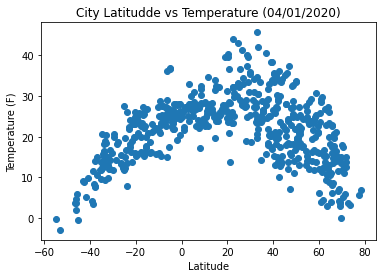

In [23]:
plt.scatter(cdf['Latitude'],cdf['Max Temperature'])
plt.title("City Latitudde vs Temperature (04/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

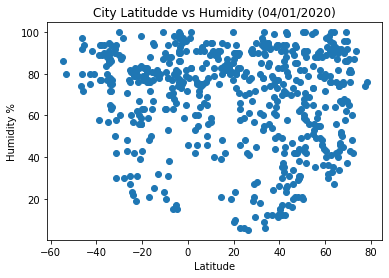

In [24]:
plt.scatter(cdf['Latitude'],cdf['Humidity'])
plt.title("City Latitudde vs Humidity (04/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.show()

## Latitude vs. Cloudiness Plot

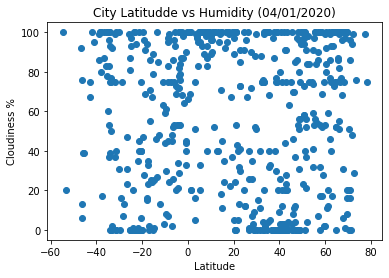

In [25]:
plt.scatter(cdf['Latitude'],cdf['Cloudiness'])
plt.title("City Latitudde vs Humidity (04/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.show()

## Latitude vs. Wind Speed Plot

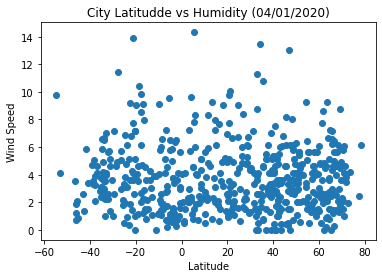

In [26]:
plt.scatter(cdf['Latitude'],cdf['Wind Speed'])
plt.title("City Latitudde vs Humidity (04/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.23158 shows a negative correlation between temperature and latitude.


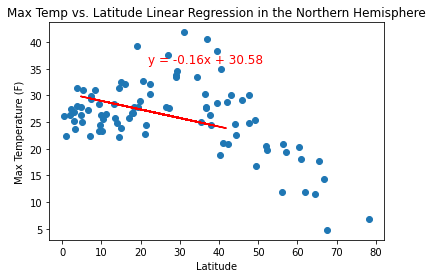

In [86]:
import scipy.stats as st
SH = cdf.loc[cdf['Latitude'] < 0]
NH = cdf.loc[cdf['Latitude'] > 0]

tempa = NH.groupby("Country")["Max Temperature"].mean()
latw = NH.groupby("Country")["Latitude"].mean()

slope, intercept, rvalue, pvalue, stderr = st.linregress(latw, tempa)
fit = slope * tempa + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latw, tempa)
plt.plot(tempa,fit,"r-")
plt.title("Max Temp vs. Latitude Linear Regression in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(22,36), fontsize=12, color="red")
print(f"-{round(rvalue**2,5)} shows a negative correlation between temperature and latitude.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.52401 shows a positive correlation between temperature and latitude.


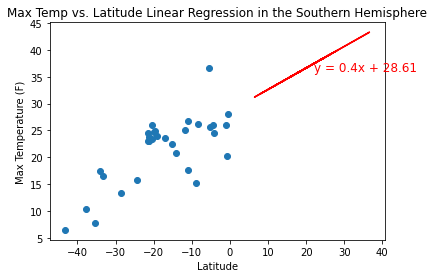

In [67]:
tempa = SH.groupby("Country")["Max Temperature"].mean()
latw = SH.groupby("Country")["Latitude"].mean()

slope, intercept, rvalue, pvalue, stderr = st.linregress(latw, tempa)
fit = slope * tempa + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latw, tempa)
plt.plot(tempa,fit,"r-")
plt.title("Max Temp vs. Latitude Linear Regression in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq,(22,36), fontsize=12, color="red")
print(f"{round(rvalue**2,5)} shows a positive correlation between temperature and latitude.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

-0.03352 shows a negative correlation between humidity and latitude.


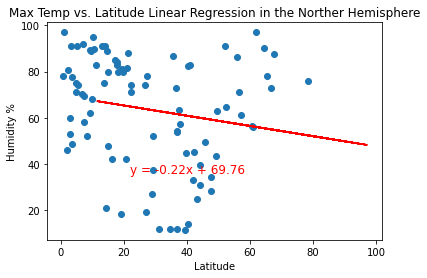

In [68]:
tempa = NH.groupby("Country")["Humidity"].mean()
latw = NH.groupby("Country")["Latitude"].mean()

slope, intercept, rvalue, pvalue, stderr = st.linregress(latw, tempa)
fit = slope * tempa + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latw, tempa)
plt.plot(tempa,fit,"r-")
plt.title("Max Temp vs. Latitude Linear Regression in the Norther Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.annotate(line_eq,(22,36), fontsize=12, color="red")
print(f"-{round(rvalue**2,5)} shows a negative correlation between humidity and latitude.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

-0.0094 shows a negative correlation between humidity and latitude.


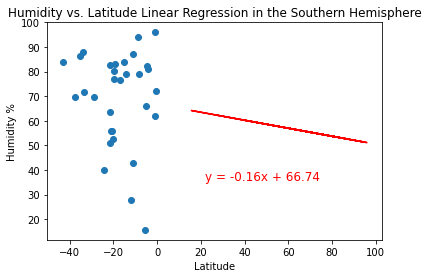

In [62]:
tempa = SH.groupby("Country")["Humidity"].mean()
latw = SH.groupby("Country")["Latitude"].mean()

slope, intercept, rvalue, pvalue, stderr = st.linregress(latw, tempa)
fit = slope * tempa + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latw, tempa)
plt.plot(tempa,fit,"r-")
plt.title("Humidity vs. Latitude Linear Regression in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.annotate(line_eq,(22,36), fontsize=12, color="red")
print(f"-{round(rvalue**2,5)} shows a negative correlation between humidity and latitude.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

-0.0613 shows a negative correlation between Cloudiness (%) and latitude.


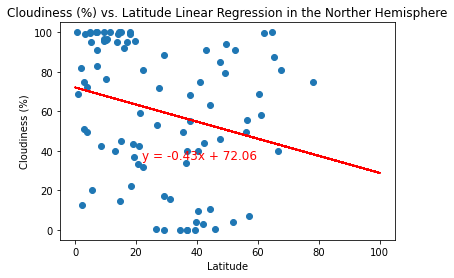

In [61]:
tempa = NH.groupby("Country")["Cloudiness"].mean()
latw = NH.groupby("Country")["Latitude"].mean()

slope, intercept, rvalue, pvalue, stderr = st.linregress(latw, tempa)
fit = slope * tempa + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latw, tempa)
plt.plot(tempa,fit,"r-")
plt.title("Cloudiness (%) vs. Latitude Linear Regression in the Norther Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(22,36), fontsize=12, color="red")
print(f"-{round(rvalue**2,5)} shows a negative correlation between Cloudiness (%) and latitude.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.08598 shows a positive correlation between Cloudiness (%) and latitude.


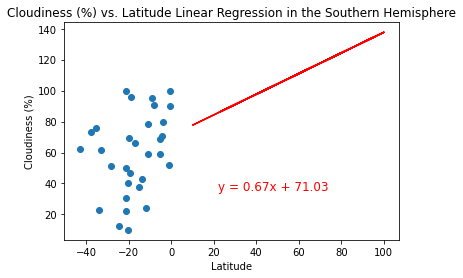

In [69]:
tempa = SH.groupby("Country")["Cloudiness"].mean()
latw = SH.groupby("Country")["Latitude"].mean()

slope, intercept, rvalue, pvalue, stderr = st.linregress(latw, tempa)
fit = slope * tempa + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latw, tempa)
plt.plot(tempa,fit,"r-")
plt.title("Cloudiness (%) vs. Latitude Linear Regression in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(22,36), fontsize=12, color="red")
print(f"{round(rvalue**2,5)} shows a positive correlation between Cloudiness (%) and latitude.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.01875 shows a positive correlation between Wind speed and latitude.


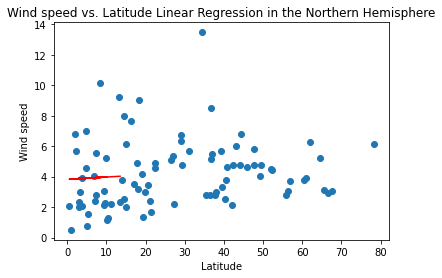

In [77]:
tempa = NH.groupby("Country")["Wind Speed"].mean()
latw = NH.groupby("Country")["Latitude"].mean()

slope, intercept, rvalue, pvalue, stderr = st.linregress(latw, tempa)
fit = slope * tempa + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latw, tempa)
plt.plot(tempa,fit,"r-")
plt.title("Wind speed vs. Latitude Linear Regression in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.annotate(line_eq,(22,36), fontsize=12, color="red")
print(f"{round(rvalue**2,5)} shows a positive correlation between Wind speed and latitude.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.05219 shows a negative correlation between Wind speed and latitude.


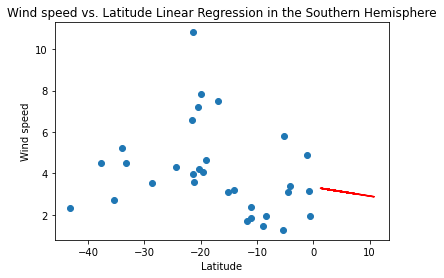

In [91]:
tempa = SH.groupby("Country")["Wind Speed"].mean()
latw = SH.groupby("Country")["Latitude"].mean()

slope, intercept, rvalue, pvalue, stderr = st.linregress(latw, tempa)
fit = slope * tempa + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(latw, tempa)
plt.plot(tempa,fit,"r-")
plt.title("Wind speed vs. Latitude Linear Regression in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.annotate(line_eq,(22,36), fontsize=12, color="red")
print(f"-{round(rvalue**2,5)} shows a negative correlation between Wind speed and latitude.")